# 1. Install and Import Dependencies

In [1]:
!git clone https://github.com/ultralytics/yolov5

正複製到 'yolov5'...
remote: Enumerating objects: 12583, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 12583 (delta 76), reused 88 (delta 54), pack-reused 12467
接收物件中: 100% (12583/12583), 12.75 MiB | 1.09 MiB/s, 完成.
處理 delta 中: 100% (8672/8672), 完成.


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

/opt/anaconda3/envs/mlapp/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/chengwei/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-20 Python-3.9.13 torch-1.12.1 CPU

100%|██████████████████████████████████████| 14.1M/14.1M [00:13<00:00, 1.12MB/s]

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [5]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1339.9ms pre-process, 361.8ms inference, 11.9ms NMS per image at shape (1, 3, 384, 640)


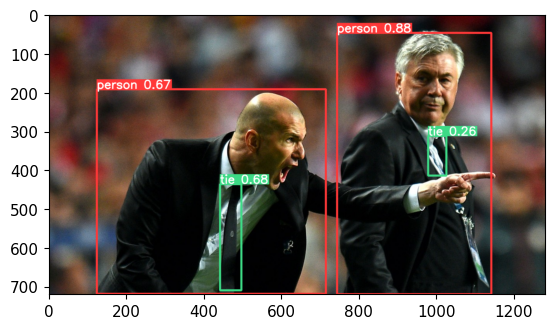

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.xyxy

[tensor([[7.43291e+02, 4.83436e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61518e-01, 2.70000e+01]])]

In [9]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [10]:
np.array(results.render()).shape

(1, 720, 1280, 3)

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render())# 4. Real Time Detections)
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [12]:
import uuid
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [20]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        # Webcam feed
        ret, frame = cap.read()
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label + '_' + str(uuid.uuid1()) + '.jpg')
        # Writes out image to file
        cv2.imwrite(imgname, frame)
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        # 2 second delay between captures
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
!git clone https://github.com/heartexlabs/labelImg

正複製到 'labelImg'...
remote: Enumerating objects: 2090, done.
remote: Total 2090 (delta 0), reused 0 (delta 0), pack-reused 2090
接收物件中: 100% (2090/2090), 232.88 MiB | 1.09 MiB/s, 完成.
處理 delta 中: 100% (1245/1245), 完成.


In [17]:
!pip install pyqt5 lxml

/opt/anaconda3/envs/mlapp/bin/pyrcc5: File does not exist 'resources.qrc'


In [19]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Test

In [22]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.9.13 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sc

# Train

In [24]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 150 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.2-143-g63368e7 Python-3.9.13 torch-1.12.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.012          1      0.319     0.0964

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      9/149         0G    0.07237    0.02318    0.04953         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40     0.0117          1      0.479      0.165

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     10/149         0G    0.06339    0.02676    0.04561         19        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40     0.0531          1      0.205      0.073

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     11/149         0G    0.06656    0.02268    0.04228         17        320: 1
          

     33/149         0G    0.06541    0.01798    0.03236         22        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.384        0.5      0.615      0.325

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     34/149         0G    0.06697    0.01549    0.03187         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.519      0.698      0.673      0.295

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     35/149         0G    0.06968    0.01404    0.03201         18        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.465       0.65      0.596      0.113

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     36/14

     58/149         0G      0.043    0.01363    0.02683         17        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.356      0.922      0.595      0.298

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     59/149         0G    0.05201    0.01314    0.02763         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.621      0.662      0.767      0.375

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     60/149         0G    0.03988     0.0136    0.02506         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.621      0.662      0.767      0.375

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     61/14

     83/149         0G    0.04149    0.01266     0.0147         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.833      0.988      0.995      0.502

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     84/149         0G    0.03893    0.01052    0.01785         15        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.833      0.988      0.995      0.502

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     85/149         0G    0.03672     0.0125      0.016         21        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.992      0.989      0.995      0.691

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     86/14

    108/149         0G    0.02555   0.008647    0.01066         15        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.991          1      0.995      0.704

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    109/149         0G    0.02846   0.008962    0.01268         16        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.992          1      0.995      0.637

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    110/149         0G     0.0295    0.01004   0.009807         16        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.992          1      0.995      0.703

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    111/14

    133/149         0G    0.02221    0.01017   0.008931         20        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.995          1      0.995      0.784

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    134/149         0G    0.02321   0.008269    0.01175         16        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.995          1      0.995      0.797

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    135/149         0G    0.02115   0.009621   0.008924         13        320: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.995          1      0.995       0.81

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    136/14

# 6. Load Custom Model

In [25]:
import uuid
import os
import time

In [26]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt')

Using cache found in /Users/chengwei/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-20 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [27]:
img = os.path.join('data', 'images', 'drowsy_0dfbb29c-38b2-11ed-8ae8-ce115d578b4b.jpg')

In [28]:
results = model(img)
results.print()

image 1/1: 720x1280 1 drowsy
Speed: 51.4ms pre-process, 307.6ms inference, 2.5ms NMS per image at shape (1, 3, 384, 640)


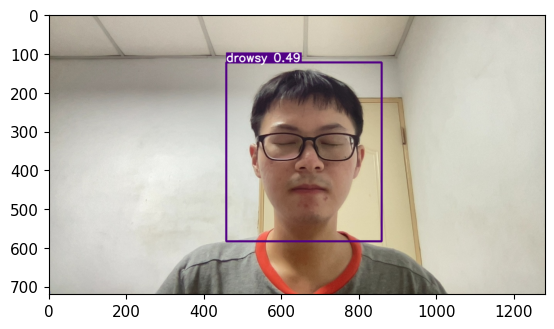

In [30]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()